# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

Data collection and processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('loan_status_prediction.csv')

In [3]:
# printing the first five rows of the DataFrame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan_dataset.reset_index(inplace=True,drop=True)

In [11]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 48.9+ KB


In [12]:
# label encoding
loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}},inplace = True)

In [13]:
# printing the first five rows of the DataFrame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [14]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [15]:
# replacing the value of 3+ to 4
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace(to_replace='3+', value=4)

In [16]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualisation

<Axes: xlabel='Education', ylabel='count'>

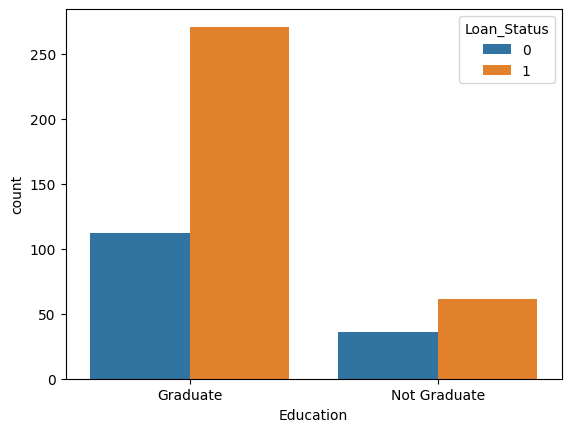

In [17]:
# education and loan status
sns.countplot(x='Education',hue='Loan_Status',data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

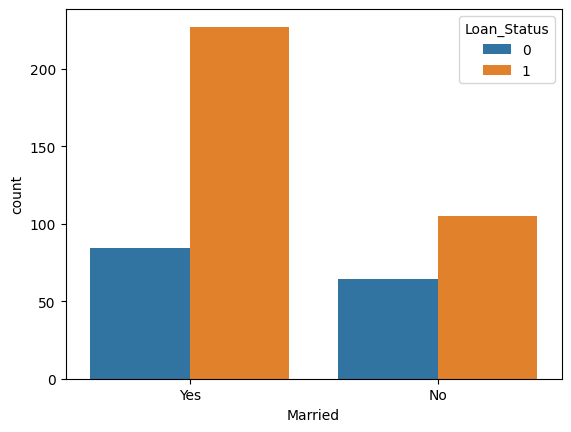

In [18]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: >

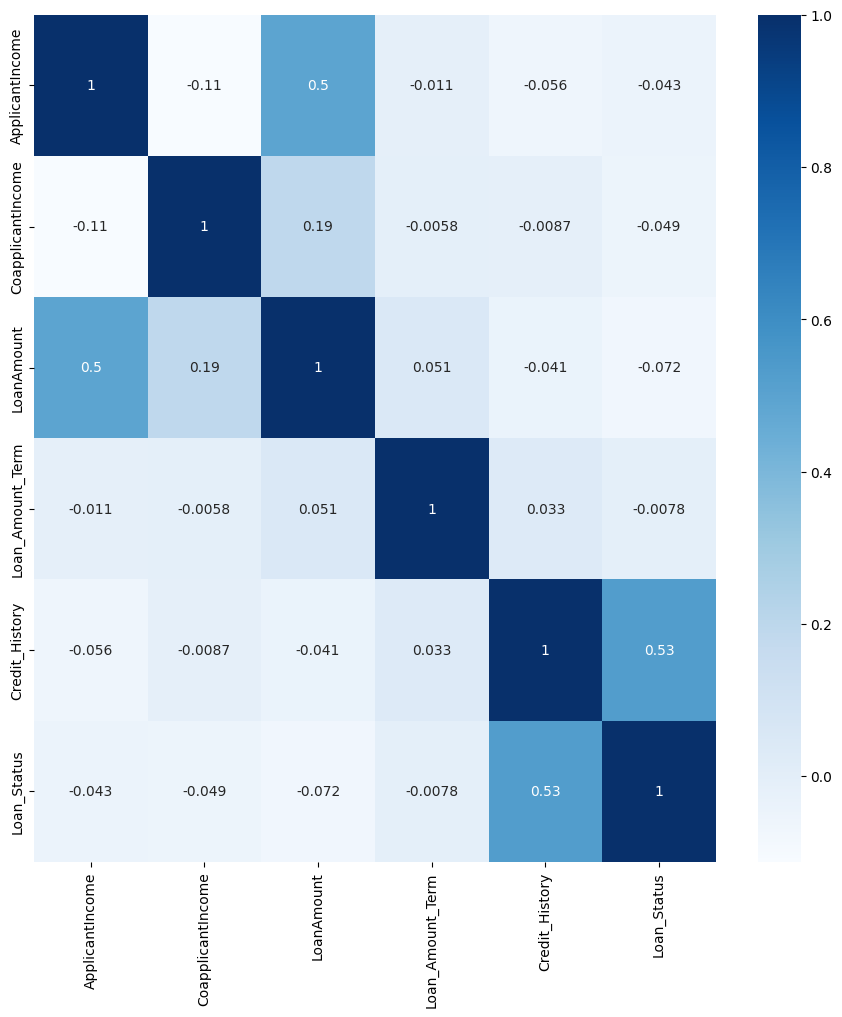

In [19]:
cor = loan_dataset.corr(numeric_only=True)
plt.figure(figsize=(11,11))
sns.heatmap(cor,annot=True,cmap='Blues')

In [20]:
loan_dataset = loan_dataset.drop(['Loan_Amount_Term'],axis=1)

In [21]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [22]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,1.0,2,1
4,LP001011,1,1,2,1,1,5417,4196.0,267.0,1.0,2,1


<Axes: >

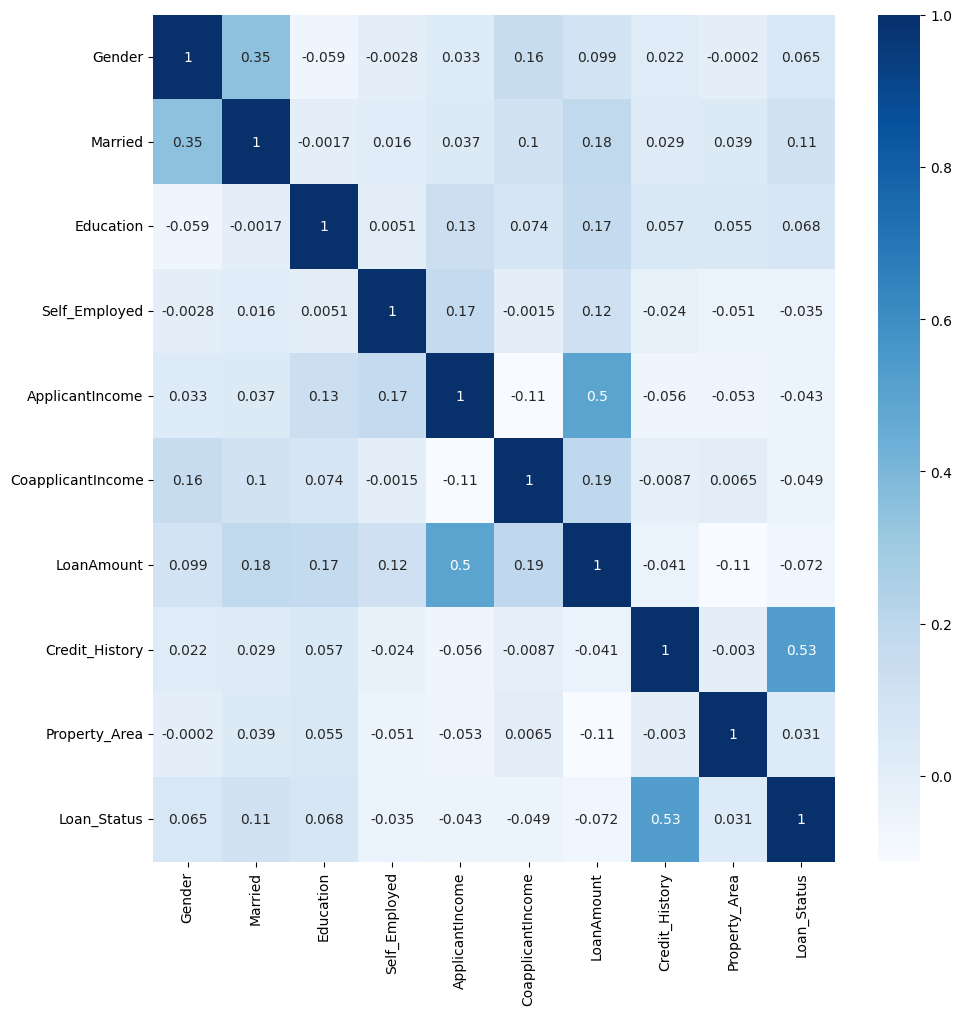

In [23]:
cor = loan_dataset.corr(numeric_only=True)
plt.figure(figsize=(11,11))
sns.heatmap(cor,annot=True,cmap='Blues')

In [24]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
loan_dataset = loan_dataset.drop(['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],axis=1)

In [26]:
# separating the data and label
X = loan_dataset.drop(['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [27]:
X.shape

(480, 6)

In [28]:
Y.shape

(480,)

Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(480, 6) (384, 6) (96, 6)


# Model Building

In [31]:
model = RandomForestClassifier()

In [32]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

In [33]:
# Accuracy score
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8020833333333334


In [34]:
# Classification report of the model
report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.40      0.56        30
           1       0.78      0.98      0.87        66

    accuracy                           0.80        96
   macro avg       0.85      0.69      0.72        96
weighted avg       0.83      0.80      0.77        96

